In [40]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime, timedelta


from urllib.request import urlopen
import json
import glob
import os
from functools import reduce


# set the global variables: the country we are selecting, and today's date!

country_for_url = 'United%20Kingdom'
country_for_filenames = 'UnitedKingdom'
todays_date='080922'

# define the URLs of the TOAR v1 dataset that we are interested in.

BASEURL = "https://join.fz-juelich.de/services/rest/surfacedata/"

URL1 = "search/?station_country="+country_for_url+"&parameter_name=o3,no,no2,pm2p5&columns=id,network_name,station_id,station_country,station_lat,station_lon&format=json"

# select mean O3

#URL2 = "stats/?id=%i&sampling=daily&statistics=average_values&format=json"

# select daytime average, typically for environmental data

#URL2 = "stats/?id=%i&sampling=daily&statistics=daytime_avg&format=json"

# select O3 dma8eu_strict...need different ones for China...
# dma8eu or dma8eu_strict here...

URL2 = "stats/?id=%i&sampling=daily&statistics=dma8eu_strict,data_capture&format=json"

# ***************************************************
# Find all the sites and their associated data series
# first: find all sites
# ***************************************************
print("Opening URL1...")
response = urlopen(BASEURL + URL1).read().decode('utf-8')
print("response = ", response[:200], " ... ")
metadata = json.loads(response)

# Here we are downloading all dataseries for our specified search. This takes a while to run.

# create an empty dataframe...
df_test = pd.DataFrame()

# loop to download the dataseries for the variable of interest, at all stations where it is present, alongside station metadata and static attributes for the station that the variable dataseries is coming from.

for s in metadata:
    # find all the dataseries
    all_dataseries = s[0]
    #print(s)
    #print(all_dataseries)
    for series in all_dataseries:
        # download each individual series separately here
        #print("Opening URL2...")
        #print(series)
    
        # isolate and download the particular series that we are interested in
        dresponse = urlopen(BASEURL + URL2  % series).read().decode('utf-8')
        data = json.loads(dresponse)
        print(data['metadata']['parameter_name'])
        print(data['metadata']['station_name'], data['metadata']['station_country'])
            
        # may need to change between average values and dma8, depending on whether we are looking for env or dma8
        new_row = pd.DataFrame({'series_id': series, 
                       #'average_values': data['mean'], 
                       'dma8': data['dma8eu_strict'],
                       'datetime':data['datetime'], 
                       #'data_capture': data['data_capture'],
                       'country':data['metadata']['station_country'], 
                       'variable_name':data['metadata']['parameter_name'],
                       'variable_label':data['metadata']['parameter_label'],               
                       'units':data['metadata']['parameter_original_units'],
                       'station_etopo_alt':data['metadata']['station_etopo_alt'],
                       'station_rel_etopo_alt':data['metadata']['station_etopo_relative_alt'],
                       'lat':s[4],'lon':s[5],'nox_emi':data['metadata']['station_nox_emissions'], 
                       'omi_nox':data['metadata']['station_omi_no2_column'],
                       'station_name':data['metadata']['station_name'], 'station_type':data['metadata']['station_type'],
                       'alt':data['metadata']['station_alt'], 'landcover':data['metadata']['station_dominant_landcover'],
                       'pop_density':data['metadata']['station_population_density'],
                       'max_5km_pop_density':data['metadata']['station_max_population_density_5km'],
                       'max_25km_pop_density':data['metadata']['station_max_population_density_25km'],
                       'nightlight_1km':data['metadata']['station_nightlight_1km'], 
                       'nightlight_max_25km':data['metadata']['station_max_nightlight_25km'],
                       'toar_category':data['metadata']['station_toar_category'], 
                       'measurement_method':data['metadata']['parameter_measurement_method']})
        #print(new_row)
            # append all these individual series to the initially empty dataframe that was instantiated earlier
        #df_test = df_test.append(new_row, ignore_index = True)
        df_test = pd.concat([df_test, new_row], axis=0, ignore_index = True)
        

            

Opening URL1...
response =  [[[21857], "GAW", "EDM655N00", "United Kingdom", 55.31334, -3.20687], [[120885, 113348, 115806, 24396, 40633], "AIRBASE", "GB0729A", "United Kingdom", 57.15736, -2.094278], [[40634, 113382, 115842], "  ... 
o3
Eskdalemuir United Kingdom
o3
ABERDEEN United Kingdom
no
ABERDEEN United Kingdom
no2
ABERDEEN United Kingdom
o3
ABERDEEN United Kingdom
no2
ABERDEEN United Kingdom
no2
ABERDEEN UNION STREET ROADSIDE United Kingdom
no
ABERDEEN UNION STREET ROADSIDE United Kingdom
no2
ABERDEEN UNION STREET ROADSIDE United Kingdom
no2
ARMAGH ROADSIDE United Kingdom
no
ARMAGH ROADSIDE United Kingdom
no2
ARMAGH ROADSIDE United Kingdom
no2
ASTON HILL United Kingdom
no2
ASTON HILL United Kingdom
o3
ASTON HILL United Kingdom
no
ASTON HILL United Kingdom
o3
ASTON HILL United Kingdom
o3
AUCHENCORTH MOSS United Kingdom
o3
AUCHENCORTH MOSS United Kingdom
no
BARNSLEY GAWBER United Kingdom
no2
BARNSLEY GAWBER United Kingdom
o3
BARNSLEY GAWBER United Kingdom
o3
BARNSLEY GAWBER United

In [42]:
df_test['variable_name'].unique()

array(['o3', 'no', 'no2'], dtype=object)

In [43]:
df_test

,series_id,dma8,datetime,country,variable_name,variable_label,units,station_etopo_alt,station_rel_etopo_alt,lat,...,station_type,alt,landcover,pop_density,max_5km_pop_density,max_25km_pop_density,nightlight_1km,nightlight_max_25km,toar_category,measurement_method
0,21857,NaN,1986-04-23 00:00,United Kingdom,o3,O3,ppb,232.0,22.0,55.313340,...,background,242.0,5,79,81,405,0.0,29.0,1,unknown
1,21857,37.625000,1986-04-24 00:00,United Kingdom,o3,O3,ppb,232.0,22.0,55.313340,...,background,242.0,5,79,81,405,0.0,29.0,1,unknown
2,21857,44.625000,1986-04-25 00:00,United Kingdom,o3,O3,ppb,232.0,22.0,55.313340,...,background,242.0,5,79,81,405,0.0,29.0,1,unknown
3,21857,43.125000,1986-04-26 00:00,United Kingdom,o3,O3,ppb,232.0,22.0,55.313340,...,background,242.0,5,79,81,405,0.0,29.0,1,unknown
4,21857,47.875000,1986-04-27 00:00,United Kingdom,o3,O3,ppb,232.0,22.0,55.313340,...,background,242.0,5,79,81,405,0.0,29.0,1,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1702731,120919,33.929738,2017-12-27 00:00,United Kingdom,o3,O3,µg/m3,-999.0,-999.0,55.002818,...,background,54.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
1702732,120919,25.999063,2017-12-28 00:00,United Kingdom,o3,O3,µg/m3,-999.0,-999.0,55.002818,...,background,54.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
1702733,120919,41.185238,2017-12-29 00:00,United Kingdom,o3,O3,µg/m3,-999.0,-999.0,55.002818,...,background,54.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
1702734,120919,36.952625,2017-12-30 00:00,United Kingdom,o3,O3,µg/m3,-999.0,-999.0,55.002818,...,background,54.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...


In [44]:
df_test_o3 = df_test[df_test['variable_name']=='o3']
df_test_no2 = df_test[df_test['variable_name']=='no2']
df_test_no = df_test[df_test['variable_name']=='no']

In [45]:
df_test_no['no'] = df_test_no['dma8']
df_test_no2['no2'] = df_test_no2['dma8']
df_test_o3['o3'] = df_test_o3['dma8']

/tmp/ipykernel_3018/781659339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_no['no'] = df_test_no['dma8']
/tmp/ipykernel_3018/781659339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_no2['no2'] = df_test_no2['dma8']
/tmp/ipykernel_3018/781659339.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [48]:
# drop annoying stuff

df_test_o3_dropped_cols = df_test_o3.drop(['dma8', 'series_id', 'variable_name', 'variable_label', 'units', 'measurement_method'], axis=1)
df_test_no2_dropped_cols = df_test_no2.drop(['dma8', 'series_id', 'variable_name', 'variable_label', 'units', 'measurement_method'], axis=1)
df_test_no_dropped_cols = df_test_no.drop(['dma8', 'series_id', 'variable_name', 'variable_label', 'units', 'measurement_method'], axis=1)

In [49]:
df_test_no2_dropped_cols

,datetime,country,station_etopo_alt,station_rel_etopo_alt,lat,lon,nox_emi,omi_nox,station_name,station_type,alt,landcover,pop_density,max_5km_pop_density,max_25km_pop_density,nightlight_1km,nightlight_max_25km,toar_category,no2
7195,2013-04-08 00:00,United Kingdom,21.0,21.0,57.157360,-2.094278,5.58598,1.8,ABERDEEN,background,5.0,13,49081,49081,49081,63.0,63.0,3,NaN
7196,2013-04-09 00:00,United Kingdom,21.0,21.0,57.157360,-2.094278,5.58598,1.8,ABERDEEN,background,5.0,13,49081,49081,49081,63.0,63.0,3,4.134030
7197,2013-04-10 00:00,United Kingdom,21.0,21.0,57.157360,-2.094278,5.58598,1.8,ABERDEEN,background,5.0,13,49081,49081,49081,63.0,63.0,3,8.139157
7198,2013-04-11 00:00,United Kingdom,21.0,21.0,57.157360,-2.094278,5.58598,1.8,ABERDEEN,background,5.0,13,49081,49081,49081,63.0,63.0,3,15.406979
7199,2013-04-12 00:00,United Kingdom,21.0,21.0,57.157360,-2.094278,5.58598,1.8,ABERDEEN,background,5.0,13,49081,49081,49081,63.0,63.0,3,27.226537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700205,2015-12-27 00:00,United Kingdom,-999.0,-999.0,53.518868,-1.138073,-999.00000,-999.0,Doncaster A630 Cleveland Street,traffic,15.0,-1,-1,-1,-1,-999.0,-999.0,-1,22.478775
1700206,2015-12-28 00:00,United Kingdom,-999.0,-999.0,53.518868,-1.138073,-999.00000,-999.0,Doncaster A630 Cleveland Street,traffic,15.0,-1,-1,-1,-1,-999.0,-999.0,-1,15.325188
1700207,2015-12-29 00:00,United Kingdom,-999.0,-999.0,53.518868,-1.138073,-999.00000,-999.0,Doncaster A630 Cleveland Street,traffic,15.0,-1,-1,-1,-1,-999.0,-999.0,-1,17.845888
1700208,2015-12-30 00:00,United Kingdom,-999.0,-999.0,53.518868,-1.138073,-999.00000,-999.0,Doncaster A630 Cleveland Street,traffic,15.0,-1,-1,-1,-1,-999.0,-999.0,-1,18.049950


In [50]:
try:
    dfs = [df_test_o3_dropped_cols, df_test_no2_dropped_cols, df_test_no_dropped_cols]
except: 
    print('One or more of the dfs is missing')

In [69]:
#merge all DataFrames into one
final_df = reduce(lambda  left,right: pd.merge(left,right,on=['datetime', 'country', 'station_name', 'lat', 'lon', 'alt', 'station_etopo_alt',  
                                                              'station_rel_etopo_alt', 'station_type', 	'landcover', 
                                                              'toar_category', 'pop_density', 'max_5km_pop_density', 'max_25km_pop_density', 
                                                              'nightlight_1km', 'nightlight_max_25km', 'nox_emi', 'omi_nox'],
                                            how='outer'), dfs)




final_df_sorted = final_df.sort_values(['station_name', 'datetime'], ignore_index=True)

final_df_sorted['datetime'] = pd.to_datetime(final_df_sorted['datetime'], format='%Y-%m-%d')

final_df_sorted = final_df_sorted.replace(-1.0, np.nan)
final_df_sorted = final_df_sorted.replace(-999.0, np.nan)

final_df_sorted_dropna = final_df_sorted.dropna()


In [63]:
# final_df_sorted = final_df_sorted.dropna(subset=['o3'])

In [70]:
final_df_sorted

,datetime,country,station_etopo_alt,station_rel_etopo_alt,lat,lon,nox_emi,omi_nox,station_name,station_type,...,landcover,pop_density,max_5km_pop_density,max_25km_pop_density,nightlight_1km,nightlight_max_25km,toar_category,o3,no2,no
0,1999-09-18,United Kingdom,21.0,21.0,57.157360,-2.094278,5.58598,1.80,ABERDEEN,background,...,13.0,49081.0,49081.0,49081.0,63.0,63.0,3.0,NaN,16.585610,NaN
1,1999-09-19,United Kingdom,21.0,21.0,57.157360,-2.094278,5.58598,1.80,ABERDEEN,background,...,13.0,49081.0,49081.0,49081.0,63.0,63.0,3.0,NaN,5.360443,NaN
2,1999-09-20,United Kingdom,21.0,21.0,57.157360,-2.094278,5.58598,1.80,ABERDEEN,background,...,13.0,49081.0,49081.0,49081.0,63.0,63.0,3.0,NaN,4.118389,NaN
3,1999-09-21,United Kingdom,21.0,21.0,57.157360,-2.094278,5.58598,1.80,ABERDEEN,background,...,13.0,49081.0,49081.0,49081.0,63.0,63.0,3.0,NaN,20.395825,NaN
4,1999-09-22,United Kingdom,21.0,21.0,57.157360,-2.094278,5.58598,1.80,ABERDEEN,background,...,13.0,49081.0,49081.0,49081.0,63.0,63.0,3.0,NaN,21.114911,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117067,2014-12-27,United Kingdom,121.0,91.0,50.596389,-3.713056,1.61496,2.58,Yarner Wood,background,...,10.0,2639.0,2642.0,34777.0,8.0,63.0,1.0,41.619750,NaN,NaN
1117068,2014-12-28,United Kingdom,121.0,91.0,50.596389,-3.713056,1.61496,2.58,Yarner Wood,background,...,10.0,2639.0,2642.0,34777.0,8.0,63.0,1.0,39.224188,NaN,NaN
1117069,2014-12-29,United Kingdom,121.0,91.0,50.596389,-3.713056,1.61496,2.58,Yarner Wood,background,...,10.0,2639.0,2642.0,34777.0,8.0,63.0,1.0,30.839183,NaN,NaN
1117070,2014-12-30,United Kingdom,121.0,91.0,50.596389,-3.713056,1.61496,2.58,Yarner Wood,background,...,10.0,2639.0,2642.0,34777.0,8.0,63.0,1.0,32.029150,NaN,NaN


In [65]:
uk_old_method_data = pd.read_csv('/home/jovyan/lustre_scratch/cas/european_data_new_temp/country/uk/dma8/dma8_data.csv')
uk_old_method_data_dropna = pd.read_csv('/home/jovyan/lustre_scratch/cas/european_data_new_temp/country/uk/dma8/dma8_dropna_data.csv')

In [66]:
uk_old_method_data

,datetime,o3,station_name,lat,lon,alt,station_etopo_alt,station_rel_etopo_alt,station_type,landcover,toar_category,pop_density,max_5km_pop_density,max_25km_pop_density,nightlight_1km,nightlight_max_25km,nox_emi,omi_nox,no2,no
0,1999-09-18,NaN,ABERDEEN,57.157360,-2.094278,5.0,21.0,21.0,background,13.0,3.0,49081.0,49081.0,49081.0,63.0,63.0,5.58598,1.80,16.585610,NaN
1,1999-09-19,NaN,ABERDEEN,57.157360,-2.094278,5.0,21.0,21.0,background,13.0,3.0,49081.0,49081.0,49081.0,63.0,63.0,5.58598,1.80,5.360443,NaN
2,1999-09-20,NaN,ABERDEEN,57.157360,-2.094278,5.0,21.0,21.0,background,13.0,3.0,49081.0,49081.0,49081.0,63.0,63.0,5.58598,1.80,4.118389,NaN
3,1999-09-21,NaN,ABERDEEN,57.157360,-2.094278,5.0,21.0,21.0,background,13.0,3.0,49081.0,49081.0,49081.0,63.0,63.0,5.58598,1.80,20.395825,NaN
4,1999-09-22,NaN,ABERDEEN,57.157360,-2.094278,5.0,21.0,21.0,background,13.0,3.0,49081.0,49081.0,49081.0,63.0,63.0,5.58598,1.80,21.114911,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117067,2014-12-27,41.619750,Yarner Wood,50.596389,-3.713056,119.0,121.0,91.0,background,10.0,1.0,2639.0,2642.0,34777.0,8.0,63.0,1.61496,2.58,NaN,NaN
1117068,2014-12-28,39.224188,Yarner Wood,50.596389,-3.713056,119.0,121.0,91.0,background,10.0,1.0,2639.0,2642.0,34777.0,8.0,63.0,1.61496,2.58,NaN,NaN
1117069,2014-12-29,30.839183,Yarner Wood,50.596389,-3.713056,119.0,121.0,91.0,background,10.0,1.0,2639.0,2642.0,34777.0,8.0,63.0,1.61496,2.58,NaN,NaN
1117070,2014-12-30,32.029150,Yarner Wood,50.596389,-3.713056,119.0,121.0,91.0,background,10.0,1.0,2639.0,2642.0,34777.0,8.0,63.0,1.61496,2.58,NaN,NaN


In [72]:
import matplotlib.pyplot as plt

(35.0, 36.5)

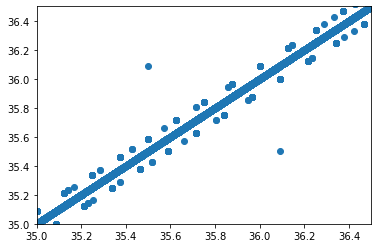

In [82]:
plt.scatter(uk_old_method_data.o3, final_df_sorted.o3)
plt.xlim(35.0,36.5)
plt.ylim(35.0,36.5)

In [68]:
uk_old_method_data_dropna

,datetime,o3,station_name,lat,lon,alt,station_etopo_alt,station_rel_etopo_alt,station_type,landcover,toar_category,pop_density,max_5km_pop_density,max_25km_pop_density,nightlight_1km,nightlight_max_25km,nox_emi,omi_nox,no2,no
0,2015-01-01,34.617200,ABERDEEN,57.15736,-2.094278,5.0,21.0,21.0,background,13.0,3.0,49081.0,49081.0,49081.0,63.0,63.0,5.58598,1.80,9.599286,1.442378
1,2015-01-02,39.223137,ABERDEEN,57.15736,-2.094278,5.0,21.0,21.0,background,13.0,3.0,49081.0,49081.0,49081.0,63.0,63.0,5.58598,1.80,8.727234,2.658511
2,2015-01-03,33.457725,ABERDEEN,57.15736,-2.094278,5.0,21.0,21.0,background,13.0,3.0,49081.0,49081.0,49081.0,63.0,63.0,5.58598,1.80,14.474800,7.104276
3,2015-01-04,30.957975,ABERDEEN,57.15736,-2.094278,5.0,21.0,21.0,background,13.0,3.0,49081.0,49081.0,49081.0,63.0,63.0,5.58598,1.80,30.595925,26.559051
4,2015-01-05,25.021650,ABERDEEN,57.15736,-2.094278,5.0,21.0,21.0,background,13.0,3.0,49081.0,49081.0,49081.0,63.0,63.0,5.58598,1.80,23.141500,13.197218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59215,2015-12-27,37.187075,YARNER WOOD,50.59760,-3.716510,119.0,121.0,91.0,background,10.0,1.0,2639.0,2642.0,34777.0,8.0,63.0,1.61496,2.58,3.759877,0.322276
59216,2015-12-28,35.668875,YARNER WOOD,50.59760,-3.716510,119.0,121.0,91.0,background,10.0,1.0,2639.0,2642.0,34777.0,8.0,63.0,1.61496,2.58,3.827359,0.449270
59217,2015-12-29,39.671212,YARNER WOOD,50.59760,-3.716510,119.0,121.0,91.0,background,10.0,1.0,2639.0,2642.0,34777.0,8.0,63.0,1.61496,2.58,1.931692,0.363010
59218,2015-12-30,39.647250,YARNER WOOD,50.59760,-3.716510,119.0,121.0,91.0,background,10.0,1.0,2639.0,2642.0,34777.0,8.0,63.0,1.61496,2.58,1.679399,0.292324


In [67]:
final_df_sorted_dropna

,datetime,country,station_etopo_alt,station_rel_etopo_alt,lat,lon,nox_emi,omi_nox,station_name,station_type,...,landcover,pop_density,max_5km_pop_density,max_25km_pop_density,nightlight_1km,nightlight_max_25km,toar_category,o3,no2,no
5487,2015-01-01,United Kingdom,21.0,21.0,57.15736,-2.094278,5.58598,1.80,ABERDEEN,background,...,13.0,49081.0,49081.0,49081.0,63.0,63.0,3.0,34.617200,9.599286,1.442378
5488,2015-01-02,United Kingdom,21.0,21.0,57.15736,-2.094278,5.58598,1.80,ABERDEEN,background,...,13.0,49081.0,49081.0,49081.0,63.0,63.0,3.0,39.223137,8.727234,2.658511
5489,2015-01-03,United Kingdom,21.0,21.0,57.15736,-2.094278,5.58598,1.80,ABERDEEN,background,...,13.0,49081.0,49081.0,49081.0,63.0,63.0,3.0,33.457725,14.474800,7.104276
5490,2015-01-04,United Kingdom,21.0,21.0,57.15736,-2.094278,5.58598,1.80,ABERDEEN,background,...,13.0,49081.0,49081.0,49081.0,63.0,63.0,3.0,30.957975,30.595925,26.559051
5491,2015-01-05,United Kingdom,21.0,21.0,57.15736,-2.094278,5.58598,1.80,ABERDEEN,background,...,13.0,49081.0,49081.0,49081.0,63.0,63.0,3.0,25.021650,23.141500,13.197218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103184,2015-12-27,United Kingdom,121.0,91.0,50.59760,-3.716510,1.61496,2.58,YARNER WOOD,background,...,10.0,2639.0,2642.0,34777.0,8.0,63.0,1.0,37.187075,3.759877,0.322276
1103185,2015-12-28,United Kingdom,121.0,91.0,50.59760,-3.716510,1.61496,2.58,YARNER WOOD,background,...,10.0,2639.0,2642.0,34777.0,8.0,63.0,1.0,35.668875,3.827359,0.449270
1103186,2015-12-29,United Kingdom,121.0,91.0,50.59760,-3.716510,1.61496,2.58,YARNER WOOD,background,...,10.0,2639.0,2642.0,34777.0,8.0,63.0,1.0,39.671212,1.931692,0.363010
1103187,2015-12-30,United Kingdom,121.0,91.0,50.59760,-3.716510,1.61496,2.58,YARNER WOOD,background,...,10.0,2639.0,2642.0,34777.0,8.0,63.0,1.0,39.647250,1.679399,0.292324


In [ ]:
for i in range(0,10):
    # instatiate an empty dataframe
    long_df_and_attributes = pd.DataFrame()
    
    # turn the datetimes into datetime as an index for the df
    datetime = toar_df['datetime'].iloc[i]
    datetime = datetime.replace('"', '')
    datetime = datetime.replace("[", "")
    datetime = datetime.replace("]", "")
    datetime = datetime.replace("'", "")
    datetime = datetime.replace(", ", ",")
    clean_datetime = datetime.split(",")
    clean_array_of_datetime = np.array(clean_datetime)
    datetime_df = pd.DataFrame(clean_array_of_datetime)
    datetime_df.columns = ['datetime']
    datetime_df['datetime'] = pd.to_datetime(datetime_df['datetime'], format="%Y-%m-%d %H:%M")
    #print(datetime_df)
    
    # get the data for the individual species in that row of the dataframe
    individual_variable = toar_df['dma8'].iloc[i]
    #individual_variable = np.array(individual_variable)
    #print(clean_array_individual_variable.shape)

    individual_variable_df = pd.DataFrame([individual_variable])
    individual_variable_df.columns = [toar_df['variable_name'].iloc[i]]    
    
    # concatenate them
    datetime_df = pd.concat([datetime_df, individual_variable_df], axis=1) 
        
    # add all the extra information, which is static. I may need to add to this later.
    dict_of_stuff = {'station_name': toar_df['station_name'].iloc[i],
                 'lat': toar_df['lat'].iloc[i],
                 'lon': toar_df['lon'].iloc[i],
                 'alt': toar_df['altitude'].iloc[i],
                 'station_etopo_alt': toar_df['station_etopo_alt'].iloc[i],
                 'station_rel_etopo_alt': toar_df['station_rel_etopo_alt'].iloc[i],
                 'station_type': toar_df['station_type'].iloc[i],
                 'landcover': toar_df['landcover'].iloc[i],
                 'toar_category': toar_df['toar_category'].iloc[i],
                 'pop_density': toar_df['pop_density'].iloc[i],
                 'max_5km_pop_density': toar_df['max_5km_pop_density'].iloc[i],
                 'max_25km_pop_density': toar_df['max_25km_pop_density'].iloc[i],
                 'nightlight_1km': toar_df['nightlight_1km'].iloc[i],
                 'nightlight_max_25km': toar_df['nightlight_max_25km'].iloc[i],
                 'nox_emi': toar_df['NOx_emi'].iloc[i],
                 'omi_nox': toar_df['OMI_NOx'].iloc[i],
                }    
    # assign this extra stuff
    long_df_and_attributes = datetime_df.assign(**dict_of_stuff)
        

In [11]:
new_row['nightlight_1km']

0.0

In [7]:
pd.DataFrame(new_row)

,series_id,dma8,datetime,country,variable_name,variable_label,units,station_etopo_alt,station_rel_etopo_alt,lat,...,station_type,altitude,landcover,pop_density,max_5km_pop_density,max_25km_pop_density,nightlight_1km,nightlight_max_25km,toar_category,measurement_method
0,117309,NaN,2013-01-01 00:00,Sweden,no2,NO2,µg/m3,353.0,61.0,63.848888,...,background,380.0,8,9,9,18,0.0,50.0,1,see table instruments with label from paramete...
1,117309,NaN,2013-01-02 00:00,Sweden,no2,NO2,µg/m3,353.0,61.0,63.848888,...,background,380.0,8,9,9,18,0.0,50.0,1,see table instruments with label from paramete...
2,117309,NaN,2013-01-03 00:00,Sweden,no2,NO2,µg/m3,353.0,61.0,63.848888,...,background,380.0,8,9,9,18,0.0,50.0,1,see table instruments with label from paramete...
3,117309,NaN,2013-01-04 00:00,Sweden,no2,NO2,µg/m3,353.0,61.0,63.848888,...,background,380.0,8,9,9,18,0.0,50.0,1,see table instruments with label from paramete...
4,117309,NaN,2013-01-05 00:00,Sweden,no2,NO2,µg/m3,353.0,61.0,63.848888,...,background,380.0,8,9,9,18,0.0,50.0,1,see table instruments with label from paramete...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,117309,NaN,2014-12-27 00:00,Sweden,no2,NO2,µg/m3,353.0,61.0,63.848888,...,background,380.0,8,9,9,18,0.0,50.0,1,see table instruments with label from paramete...
726,117309,NaN,2014-12-28 00:00,Sweden,no2,NO2,µg/m3,353.0,61.0,63.848888,...,background,380.0,8,9,9,18,0.0,50.0,1,see table instruments with label from paramete...
727,117309,NaN,2014-12-29 00:00,Sweden,no2,NO2,µg/m3,353.0,61.0,63.848888,...,background,380.0,8,9,9,18,0.0,50.0,1,see table instruments with label from paramete...
728,117309,NaN,2014-12-30 00:00,Sweden,no2,NO2,µg/m3,353.0,61.0,63.848888,...,background,380.0,8,9,9,18,0.0,50.0,1,see table instruments with label from paramete...


In [5]:
df_test

,NOx_emi,OMI_NOx,altitude,country,datetime,dma8,landcover,lat,lon,max_25km_pop_density,...,pop_density,series_id,station_etopo_alt,station_name,station_rel_etopo_alt,station_type,toar_category,units,variable_label,variable_name
0,0.083042,0.60,271.0,Sweden,"[1987-01-01 00:00, 1987-01-02 00:00, 1987-01-0...","[15.675, 14.262499999999998, 22.14999999999999...",1.0,64.250000,19.770000,435.0,...,17.0,21933.0,249.0,Vindeln,76.0,background,1.0,ppb,O3,o3
1,0.326505,1.74,25.0,Sweden,"[1990-01-01 00:00, 1990-01-02 00:00, 1990-01-0...","[nan, 24.397862499999995, 24.372799999999994, ...",1.0,58.801109,17.381958,2224.0,...,225.0,25584.0,15.0,Aspvreten,8.0,background,1.0,µg/m3,O3,o3
2,0.326505,1.74,25.0,Sweden,"[2013-01-01 00:00, 2013-01-02 00:00, 2013-01-0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",1.0,58.801109,17.381958,2224.0,...,225.0,117311.0,15.0,Aspvreten,8.0,background,1.0,µg/m3,NO2,no2
3,0.326505,1.74,25.0,Sweden,"[2017-01-01 00:00, 2017-01-02 00:00, 2017-01-0...","[24.115599999999997, 31.641600000000007, 32.45...",1.0,58.801109,17.381958,2224.0,...,225.0,121713.0,15.0,Aspvreten,8.0,background,1.0,µg/m3,O3-_2_,o3
4,0.326505,1.74,25.0,Sweden,"[2015-01-01 00:00, 2015-01-02 00:00, 2015-01-0...","[27.828900000000004, 35.5063375, 35.4696875, 3...",1.0,58.801109,17.381958,2224.0,...,225.0,121682.0,15.0,Aspvreten,8.0,background,1.0,µg/m3,O3-_1_,o3
5,3.369110,1.73,170.0,Sweden,"[1999-12-31 00:00, 2000-01-01 00:00, 2000-01-0...","[nan, 17.246, nan, 29.060637500000006, 32.3782...",13.0,57.720280,12.941675,1132.0,...,1130.0,25585.0,157.0,Borås,17.0,traffic,0.0,µg/m3,O3,o3
6,3.369110,1.73,170.0,Sweden,[2014-12-31 00:00],[nan],13.0,57.720280,12.941675,1132.0,...,1130.0,121710.0,157.0,Borås,17.0,traffic,0.0,µg/m3,O3-_1_,o3
7,3.369110,1.73,170.0,Sweden,"[1999-12-31 00:00, 2000-01-01 00:00, 2000-01-0...","[nan, 14.48177142857143, 13.63082857142857, 15...",13.0,57.720280,12.941675,1132.0,...,1130.0,42427.0,157.0,Borås,17.0,traffic,0.0,µg/m3,NO2,no2
8,3.369110,1.73,170.0,Sweden,"[2013-01-01 00:00, 2013-01-02 00:00, 2013-01-0...","[4.556376249999999, 13.878324999999997, 16.764...",13.0,57.720280,12.941675,1132.0,...,1130.0,117315.0,157.0,Borås,17.0,traffic,0.0,µg/m3,NO2-_1_,no2
9,0.086299,0.56,380.0,Sweden,"[2004-06-01 00:00, 2004-06-02 00:00, 2004-06-0...","[44.1843, 50.88836250000001, 49.42225000000001...",8.0,63.848888,15.335577,18.0,...,9.0,25586.0,353.0,Bredkälen,61.0,background,1.0,µg/m3,O3,o3


In [3]:
df_test

,series_id,dma8,datetime,country,variable_name,variable_label,units,station_etopo_alt,station_rel_etopo_alt,lat,...,station_type,altitude,landcover,pop_density,max_5km_pop_density,max_25km_pop_density,nightlight_1km,nightlight_max_25km,toar_category,measurement_method
0,21933,15.675000,1987-01-01 00:00,Sweden,o3,O3,ppb,249.0,76.0,64.250000,...,background,271.0,1,17,17,435,8.0,53.0,1,UV absorption
1,21933,14.262500,1987-01-02 00:00,Sweden,o3,O3,ppb,249.0,76.0,64.250000,...,background,271.0,1,17,17,435,8.0,53.0,1,UV absorption
2,21933,22.150000,1987-01-03 00:00,Sweden,o3,O3,ppb,249.0,76.0,64.250000,...,background,271.0,1,17,17,435,8.0,53.0,1,UV absorption
3,21933,19.512500,1987-01-04 00:00,Sweden,o3,O3,ppb,249.0,76.0,64.250000,...,background,271.0,1,17,17,435,8.0,53.0,1,UV absorption
4,21933,17.775000,1987-01-05 00:00,Sweden,o3,O3,ppb,249.0,76.0,64.250000,...,background,271.0,1,17,17,435,8.0,53.0,1,UV absorption
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42590,121669,40.030262,2016-12-27 00:00,Sweden,o3,O3-_1_,µg/m3,365.0,74.0,67.878891,...,background,524.0,8,8,8,8,7.0,60.0,1,see table instruments with label from paramete...
42591,121669,40.067862,2016-12-28 00:00,Sweden,o3,O3-_1_,µg/m3,365.0,74.0,67.878891,...,background,524.0,8,8,8,8,7.0,60.0,1,see table instruments with label from paramete...
42592,121669,45.155450,2016-12-29 00:00,Sweden,o3,O3-_1_,µg/m3,365.0,74.0,67.878891,...,background,524.0,8,8,8,8,7.0,60.0,1,see table instruments with label from paramete...
42593,121669,47.179225,2016-12-30 00:00,Sweden,o3,O3-_1_,µg/m3,365.0,74.0,67.878891,...,background,524.0,8,8,8,8,7.0,60.0,1,see table instruments with label from paramete...


In [ ]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime, timedelta


from urllib.request import urlopen
import json
import glob
import os
from functools import reduce


# set the global variables: the country we are selecting, and today's date!
country = 'Sweden'
todays_date='080922'

# define the URLs of the TOAR v1 dataset that we are interested in.

BASEURL = "https://join.fz-juelich.de/services/rest/surfacedata/"

URL1 = "search/?station_country="+country+"&parameter_name=o3,no,no2,pm2p5&columns=id,network_name,station_id,station_country,station_lat,station_lon&format=json"

# select mean O3

#URL2 = "stats/?id=%i&sampling=daily&statistics=average_values&format=json"

# select daytime average, typically for environmental data

#URL2 = "stats/?id=%i&sampling=daily&statistics=daytime_avg&format=json"

# select O3 dma8eu_strict...need different ones for China...
# dma8eu or dma8eu_strict here...

URL2 = "stats/?id=%i&sampling=daily&statistics=dma8eu_strict,data_capture&format=json"

# ***************************************************
# Find all the sites and their associated data series
# first: find all sites
# ***************************************************
print("Opening URL1...")
response = urlopen(BASEURL + URL1).read().decode('utf-8')
print("response = ", response[:200], " ... ")
metadata = json.loads(response)

# Here we are downloading all dataseries for our specified search. This takes a while to run.

# create an empty dataframe...
df_test = pd.DataFrame()

# loop to download the dataseries for the variable of interest, at all stations where it is present, alongside station metadata and static attributes for the station that the variable dataseries is coming from.

for s in metadata:
    # find all the dataseries
    all_dataseries = s[0]
    #print(s)
    #print(all_dataseries)
    for series in all_dataseries:
        # download each individual series separately here
        #print("Opening URL2...")
        #print(series)
        try:
            # isolate and download the particular series that we are interested in
            dresponse = urlopen(BASEURL + URL2  % series).read().decode('utf-8')
            data = json.loads(dresponse)
            print(data['metadata']['parameter_name'])
            print(data['metadata']['station_name'], data['metadata']['station_country'])
            
            # may need to change between average values and dma8, depending on whether we are looking for env or dma8
            new_row = pd.DataFrame({'series_id': series, 
                       #'average_values': data['mean'], 
                       'dma8': data['dma8eu_strict'],
                       'datetime':data['datetime'], 
                       #'data_capture': data['data_capture'],
                       'country':data['metadata']['station_country'], 
                       'variable_name':data['metadata']['parameter_name'],
                       'variable_label':data['metadata']['parameter_label'],               
                       'units':data['metadata']['parameter_original_units'],
                       'station_etopo_alt':data['metadata']['station_etopo_alt'],
                       'station_rel_etopo_alt':data['metadata']['station_etopo_relative_alt'],
                       'lat':s[4],'lon':s[5],'NOx_emi':data['metadata']['station_nox_emissions'], 
                       'OMI_NOx':data['metadata']['station_omi_no2_column'],
                       'station_name':data['metadata']['station_name'], 'station_type':data['metadata']['station_type'],
                       'altitude':data['metadata']['station_alt'], 'landcover':data['metadata']['station_dominant_landcover'],
                       'pop_density':data['metadata']['station_population_density'],
                       'max_5km_pop_density':data['metadata']['station_max_population_density_5km'],
                       'max_25km_pop_density':data['metadata']['station_max_population_density_25km'],
                       'nightlight_1km':data['metadata']['station_nightlight_1km'], 
                       'nightlight_max_25km':data['metadata']['station_max_nightlight_25km'],
                       'toar_category':data['metadata']['station_toar_category'], 
                       'measurement_method':data['metadata']['parameter_measurement_method']})
            print(new_row)
            # append all these individual series to the initially empty dataframe that was instantiated earlier
            #df_test = df_test.append(new_row, ignore_index = True)
            df_test = pd.concat([df_test, new_row], axis=0, ignore_index = True)
        except:
            print("This URL is bad")

            

Opening URL1...
response =  [[[21933], "GAW", "VDL664N00", "Sweden", 64.25, 19.77], [[25584, 117311, 121713, 121682], "AIRBASE", "SE0012R", "Sweden", 58.801109, 17.381958], [[25585, 121710, 42427, 117315], "AIRBASE", "SE0026A",   ... 
o3
Vindeln Sweden
       series_id     dma8          datetime country variable_name  \
0          21933  15.6750  1987-01-01 00:00  Sweden            o3   
1          21933  14.2625  1987-01-02 00:00  Sweden            o3   
2          21933  22.1500  1987-01-03 00:00  Sweden            o3   
3          21933  19.5125  1987-01-04 00:00  Sweden            o3   
4          21933  17.7750  1987-01-05 00:00  Sweden            o3   
...          ...      ...               ...     ...           ...   
10223      21933  29.7875  2014-12-28 00:00  Sweden            o3   
10224      21933  30.1125  2014-12-29 00:00  Sweden            o3   
10225      21933  31.5500  2014-12-30 00:00  Sweden            o3   
10226      21933  36.4125  2014-12-31 00:00  Sweden      

In [12]:
df_test

,NOx_emi,OMI_NOx,altitude,country,datetime,dma8,landcover,lat,lon,max_25km_pop_density,...,pop_density,series_id,station_etopo_alt,station_name,station_rel_etopo_alt,station_type,toar_category,units,variable_label,variable_name
0,0.083042,0.60,271.0,Sweden,"[1987-01-01 00:00, 1987-01-02 00:00, 1987-01-0...","[15.675, 14.262499999999998, 22.14999999999999...",1.0,64.250000,19.770000,435.0,...,17.0,21933.0,249.0,Vindeln,76.0,background,1.0,ppb,O3,o3
1,0.326505,1.74,25.0,Sweden,"[1990-01-01 00:00, 1990-01-02 00:00, 1990-01-0...","[nan, 24.397862499999995, 24.372799999999994, ...",1.0,58.801109,17.381958,2224.0,...,225.0,25584.0,15.0,Aspvreten,8.0,background,1.0,µg/m3,O3,o3
2,0.326505,1.74,25.0,Sweden,"[2013-01-01 00:00, 2013-01-02 00:00, 2013-01-0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",1.0,58.801109,17.381958,2224.0,...,225.0,117311.0,15.0,Aspvreten,8.0,background,1.0,µg/m3,NO2,no2
3,0.326505,1.74,25.0,Sweden,"[2017-01-01 00:00, 2017-01-02 00:00, 2017-01-0...","[24.115599999999997, 31.641600000000007, 32.45...",1.0,58.801109,17.381958,2224.0,...,225.0,121713.0,15.0,Aspvreten,8.0,background,1.0,µg/m3,O3-_2_,o3
4,0.326505,1.74,25.0,Sweden,"[2015-01-01 00:00, 2015-01-02 00:00, 2015-01-0...","[27.828900000000004, 35.5063375, 35.4696875, 3...",1.0,58.801109,17.381958,2224.0,...,225.0,121682.0,15.0,Aspvreten,8.0,background,1.0,µg/m3,O3-_1_,o3
5,3.369110,1.73,170.0,Sweden,"[1999-12-31 00:00, 2000-01-01 00:00, 2000-01-0...","[nan, 17.246, nan, 29.060637500000006, 32.3782...",13.0,57.720280,12.941675,1132.0,...,1130.0,25585.0,157.0,Borås,17.0,traffic,0.0,µg/m3,O3,o3
6,3.369110,1.73,170.0,Sweden,[2014-12-31 00:00],[nan],13.0,57.720280,12.941675,1132.0,...,1130.0,121710.0,157.0,Borås,17.0,traffic,0.0,µg/m3,O3-_1_,o3
7,3.369110,1.73,170.0,Sweden,"[1999-12-31 00:00, 2000-01-01 00:00, 2000-01-0...","[nan, 14.48177142857143, 13.63082857142857, 15...",13.0,57.720280,12.941675,1132.0,...,1130.0,42427.0,157.0,Borås,17.0,traffic,0.0,µg/m3,NO2,no2
8,3.369110,1.73,170.0,Sweden,"[2013-01-01 00:00, 2013-01-02 00:00, 2013-01-0...","[4.556376249999999, 13.878324999999997, 16.764...",13.0,57.720280,12.941675,1132.0,...,1130.0,117315.0,157.0,Borås,17.0,traffic,0.0,µg/m3,NO2-_1_,no2
9,0.086299,0.56,380.0,Sweden,"[2004-06-01 00:00, 2004-06-02 00:00, 2004-06-0...","[44.1843, 50.88836250000001, 49.42225000000001...",8.0,63.848888,15.335577,18.0,...,9.0,25586.0,353.0,Bredkälen,61.0,background,1.0,µg/m3,O3,o3


In [6]:
2 * 2

4

In [9]:
empty = pd.DataFrame()

In [10]:
empty = pd.concat([empty, new_row], axis=0, ignore_index = True)

In [11]:
empty

,series_id,dma8,datetime,country,variable_name,variable_label,units,station_etopo_alt,station_rel_etopo_alt,lat,...,station_type,altitude,landcover,pop_density,max_5km_pop_density,max_25km_pop_density,nightlight_1km,nightlight_max_25km,toar_category,measurement_method
0,121704,NaN,2015-01-01 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,59.3993,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
1,121704,NaN,2015-01-02 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,59.3993,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
2,121704,NaN,2015-01-03 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,59.3993,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
3,121704,NaN,2015-01-04 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,59.3993,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
4,121704,NaN,2015-01-05 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,59.3993,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,121704,40.750812,2016-12-27 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,59.3993,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
727,121704,37.348637,2016-12-28 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,59.3993,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
728,121704,34.566762,2016-12-29 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,59.3993,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
729,121704,33.263550,2016-12-30 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,59.3993,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...


In [7]:
df_test

,series_id,dma8,datetime,country,variable_name,variable_label,units,station_etopo_alt,station_rel_etopo_alt,lat,...,station_type,altitude,landcover,pop_density,max_5km_pop_density,max_25km_pop_density,nightlight_1km,nightlight_max_25km,toar_category,measurement_method
0,21933,15.675000,1987-01-01 00:00,Sweden,o3,O3,ppb,249.0,76.0,64.2500,...,background,271.0,1,17,17,435,8.0,53.0,1,UV absorption
1,21933,14.262500,1987-01-02 00:00,Sweden,o3,O3,ppb,249.0,76.0,64.2500,...,background,271.0,1,17,17,435,8.0,53.0,1,UV absorption
2,21933,22.150000,1987-01-03 00:00,Sweden,o3,O3,ppb,249.0,76.0,64.2500,...,background,271.0,1,17,17,435,8.0,53.0,1,UV absorption
3,21933,19.512500,1987-01-04 00:00,Sweden,o3,O3,ppb,249.0,76.0,64.2500,...,background,271.0,1,17,17,435,8.0,53.0,1,UV absorption
4,21933,17.775000,1987-01-05 00:00,Sweden,o3,O3,ppb,249.0,76.0,64.2500,...,background,271.0,1,17,17,435,8.0,53.0,1,UV absorption
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290894,121704,40.750812,2016-12-27 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,59.3993,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
290895,121704,37.348637,2016-12-28 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,59.3993,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
290896,121704,34.566762,2016-12-29 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,59.3993,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
290897,121704,33.263550,2016-12-30 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,59.3993,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...


In [8]:
new_row

,series_id,dma8,datetime,country,variable_name,variable_label,units,station_etopo_alt,station_rel_etopo_alt,lat,...,station_type,altitude,landcover,pop_density,max_5km_pop_density,max_25km_pop_density,nightlight_1km,nightlight_max_25km,toar_category,measurement_method
0,121704,NaN,2015-01-01 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,59.3993,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
1,121704,NaN,2015-01-02 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,59.3993,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
2,121704,NaN,2015-01-03 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,59.3993,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
3,121704,NaN,2015-01-04 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,59.3993,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
4,121704,NaN,2015-01-05 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,59.3993,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,121704,40.750812,2016-12-27 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,59.3993,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
727,121704,37.348637,2016-12-28 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,59.3993,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
728,121704,34.566762,2016-12-29 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,59.3993,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
729,121704,33.263550,2016-12-30 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,59.3993,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...


In [3]:
df_test

,series_id,dma8,datetime,country,variable_name,variable_label,units,station_etopo_alt,station_rel_etopo_alt,lat,...,station_type,altitude,landcover,pop_density,max_5km_pop_density,max_25km_pop_density,nightlight_1km,nightlight_max_25km,toar_category,measurement_method
0,21933,15.675000,1987-01-01 00:00,Sweden,o3,O3,ppb,249.0,76.0,64.2500,...,background,271.0,1,17,17,435,8.0,53.0,1,UV absorption
1,21933,14.262500,1987-01-02 00:00,Sweden,o3,O3,ppb,249.0,76.0,64.2500,...,background,271.0,1,17,17,435,8.0,53.0,1,UV absorption
2,21933,22.150000,1987-01-03 00:00,Sweden,o3,O3,ppb,249.0,76.0,64.2500,...,background,271.0,1,17,17,435,8.0,53.0,1,UV absorption
3,21933,19.512500,1987-01-04 00:00,Sweden,o3,O3,ppb,249.0,76.0,64.2500,...,background,271.0,1,17,17,435,8.0,53.0,1,UV absorption
4,21933,17.775000,1987-01-05 00:00,Sweden,o3,O3,ppb,249.0,76.0,64.2500,...,background,271.0,1,17,17,435,8.0,53.0,1,UV absorption
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290529,121704,40.750812,2016-12-27 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,59.3993,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
290530,121704,37.348637,2016-12-28 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,59.3993,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
290531,121704,34.566762,2016-12-29 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,59.3993,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
290532,121704,33.263550,2016-12-30 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,59.3993,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...


In [4]:
new_row

,series_id,dma8,datetime,country,variable_name,variable_label,units,station_etopo_alt,station_rel_etopo_alt,lat,...,station_type,altitude,landcover,pop_density,max_5km_pop_density,max_25km_pop_density,nightlight_1km,nightlight_max_25km,toar_category,measurement_method
0,121704,NaN,2015-01-01 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,59.3993,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
1,121704,NaN,2015-01-02 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,59.3993,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
2,121704,NaN,2015-01-03 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,59.3993,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
3,121704,NaN,2015-01-04 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,59.3993,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
4,121704,NaN,2015-01-05 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,59.3993,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,121704,40.750812,2016-12-27 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,59.3993,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
727,121704,37.348637,2016-12-28 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,59.3993,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
728,121704,34.566762,2016-12-29 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,59.3993,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
729,121704,33.263550,2016-12-30 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,59.3993,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...


In [12]:
# old location for saving           
# df_test.to_csv('/home/jovyan/lustre_scratch/cas/uk_avg_values_130622.csv')

# make a directory to save the file in if it doesn't already exist with path 
path = '/home/jovyan/lustre_scratch/cas/european_data_new_temp/raw_data_series/'+country+'/'
    
# Create the directory 
# 'GeeksForGeeks' in 
# '/home / User / Documents' 
try: 
    os.makedirs(path) 
except OSError as error: 
    print(error)  


[Errno 17] File exists: '/home/jovyan/lustre_scratch/cas/european_data_new_temp/raw_data_series/Sweden/'


In [68]:
toar_df

,Unnamed: 0,series_id,dma8,datetime,country,variable_name,variable_label,units,station_etopo_alt,station_rel_etopo_alt,...,station_type,altitude,landcover,pop_density,max_5km_pop_density,max_25km_pop_density,nightlight_1km,nightlight_max_25km,toar_category,measurement_method
0,0,21933,15.675000,1987-01-01 00:00,Sweden,o3,O3,ppb,249.0,76.0,...,background,271.0,1,17,17,435,8.0,53.0,1,UV absorption
1,1,21933,14.262500,1987-01-02 00:00,Sweden,o3,O3,ppb,249.0,76.0,...,background,271.0,1,17,17,435,8.0,53.0,1,UV absorption
2,2,21933,22.150000,1987-01-03 00:00,Sweden,o3,O3,ppb,249.0,76.0,...,background,271.0,1,17,17,435,8.0,53.0,1,UV absorption
3,3,21933,19.512500,1987-01-04 00:00,Sweden,o3,O3,ppb,249.0,76.0,...,background,271.0,1,17,17,435,8.0,53.0,1,UV absorption
4,4,21933,17.775000,1987-01-05 00:00,Sweden,o3,O3,ppb,249.0,76.0,...,background,271.0,1,17,17,435,8.0,53.0,1,UV absorption
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290894,290894,121704,40.750812,2016-12-27 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
290895,290895,121704,37.348637,2016-12-28 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
290896,290896,121704,34.566762,2016-12-29 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...
290897,290897,121704,33.263550,2016-12-30 00:00,Sweden,o3,O3-_1_,µg/m3,-999.0,-999.0,...,background,11.0,-1,-1,-1,-1,-999.0,-999.0,-1,see table instruments with label from paramete...


In [14]:
# save the file    
df_test.to_csv('/home/jovyan/lustre_scratch/cas/european_data_new_temp/raw_data_series/'+country+'/'+country+'_dma8_'+todays_date+'.csv')

# read the file back in
toar_df = pd.read_csv('/home/jovyan/lustre_scratch/cas/european_data_new_temp/raw_data_series/'+country+'/'+country+'_dma8_'+todays_date+'.csv') 

# make a directory to save files in if it doesn't already exist with path 
path = '/home/jovyan/lustre_scratch/cas/european_data_new_temp/per_series/'+country+'/dma8/'

In [17]:
toar_df.dtypes

Unnamed: 0                 int64
series_id                  int64
dma8                     float64
datetime                  object
country                   object
variable_name             object
variable_label            object
units                     object
station_etopo_alt        float64
station_rel_etopo_alt    float64
lat                      float64
lon                      float64
NOx_emi                  float64
OMI_NOx                  float64
station_name              object
station_type              object
altitude                 float64
landcover                  int64
pop_density                int64
max_5km_pop_density        int64
max_25km_pop_density       int64
nightlight_1km           float64
nightlight_max_25km      float64
toar_category              int64
measurement_method        object
dtype: object

In [18]:
# make a directory to save files in if it doesn't already exist with path 
path = '/home/jovyan/lustre_scratch/cas/european_data_new_temp/per_series/'+country+'/dma8/'

try: 
    os.makedirs(path) 
except OSError as error: 
    print(error)    

[Errno 17] File exists: '/home/jovyan/lustre_scratch/cas/european_data_new_temp/per_series/Sweden/dma8/'


In [61]:
datetime_df

,datetime,o3
0,1987-01-05,17.775


In [62]:
individual_variable

17.774999999999995

In [63]:
individual_variable

17.774999999999995

In [34]:
clean_array_of_datetime

array(['1987-01-01 00:00'], dtype='<U16')

In [42]:
individual_variable.dtype

dtype('float64')

In [45]:
clean_datetime

['2011-04-03 00:00']

In [47]:
datetime_df

,datetime,0
0,2011-04-03,23.166925


In [50]:
datetime_df

,datetime,o3
0,1987-01-05,17.775


In [64]:
toar_df['datetime']

0         1987-01-01 00:00
1         1987-01-02 00:00
2         1987-01-03 00:00
3         1987-01-04 00:00
4         1987-01-05 00:00
                ...       
290894    2016-12-27 00:00
290895    2016-12-28 00:00
290896    2016-12-29 00:00
290897    2016-12-30 00:00
290898    2016-12-31 00:00
Name: datetime, Length: 290899, dtype: object

In [67]:
clean_array_of_datetime

array(['1987-01-05 00:00'], dtype='<U16')

In [65]:
datetime_df

,datetime,o3
0,1987-01-05,17.775


In [49]:
for i in range(0,10):
    # instatiate an empty dataframe
    long_df_and_attributes = pd.DataFrame()
    
    # turn the datetimes into datetime as an index for the df
    datetime = toar_df['datetime'].iloc[i]
    datetime = datetime.replace('"', '')
    datetime = datetime.replace("[", "")
    datetime = datetime.replace("]", "")
    datetime = datetime.replace("'", "")
    datetime = datetime.replace(", ", ",")
    clean_datetime = datetime.split(",")
    clean_array_of_datetime = np.array(clean_datetime)
    datetime_df = pd.DataFrame(clean_array_of_datetime)
    datetime_df.columns = ['datetime']
    datetime_df['datetime'] = pd.to_datetime(datetime_df['datetime'], format="%Y-%m-%d %H:%M")
    #print(datetime_df)
    
    # get the data for the individual species in that row of the dataframe
    individual_variable = toar_df['dma8'].iloc[i]
    #individual_variable = np.array(individual_variable)
    #print(clean_array_individual_variable.shape)

    individual_variable_df = pd.DataFrame([individual_variable])
    individual_variable_df.columns = [toar_df['variable_name'].iloc[i]]    
    
    # concatenate them
    datetime_df = pd.concat([datetime_df, individual_variable_df], axis=1) 
        
    # add all the extra information, which is static. I may need to add to this later.
    dict_of_stuff = {'station_name': toar_df['station_name'].iloc[i],
                 'lat': toar_df['lat'].iloc[i],
                 'lon': toar_df['lon'].iloc[i],
                 'alt': toar_df['altitude'].iloc[i],
                 'station_etopo_alt': toar_df['station_etopo_alt'].iloc[i],
                 'station_rel_etopo_alt': toar_df['station_rel_etopo_alt'].iloc[i],
                 'station_type': toar_df['station_type'].iloc[i],
                 'landcover': toar_df['landcover'].iloc[i],
                 'toar_category': toar_df['toar_category'].iloc[i],
                 'pop_density': toar_df['pop_density'].iloc[i],
                 'max_5km_pop_density': toar_df['max_5km_pop_density'].iloc[i],
                 'max_25km_pop_density': toar_df['max_25km_pop_density'].iloc[i],
                 'nightlight_1km': toar_df['nightlight_1km'].iloc[i],
                 'nightlight_max_25km': toar_df['nightlight_max_25km'].iloc[i],
                 'nox_emi': toar_df['NOx_emi'].iloc[i],
                 'omi_nox': toar_df['OMI_NOx'].iloc[i],
                }    
    # assign this extra stuff
    long_df_and_attributes = datetime_df.assign(**dict_of_stuff)
        

In [51]:
long_df_and_attributes

,datetime,o3,station_name,lat,lon,alt,station_etopo_alt,station_rel_etopo_alt,station_type,landcover,toar_category,pop_density,max_5km_pop_density,max_25km_pop_density,nightlight_1km,nightlight_max_25km,nox_emi,omi_nox
0,1987-01-05,17.775,Vindeln,64.25,19.77,271.0,249.0,76.0,background,1,1,17,17,435,8.0,53.0,0.083042,0.6


In [54]:
clean_array_of_datetime

array(['1987-01-05 00:00'], dtype='<U16')

In [56]:
country = "Sweden"

In [59]:
long_df_and_attributes

,datetime,o3,station_name,lat,lon,alt,station_etopo_alt,station_rel_etopo_alt,station_type,landcover,toar_category,pop_density,max_5km_pop_density,max_25km_pop_density,nightlight_1km,nightlight_max_25km,nox_emi,omi_nox
0,1987-01-05,17.775,Vindeln,64.25,19.77,271.0,249.0,76.0,background,1,1,17,17,435,8.0,53.0,0.083042,0.6


In [57]:
# save each individual row, identified by the station, species, and series id?
long_df_and_attributes.to_csv('/home/jovyan/lustre_scratch/cas/european_data_new_temp/per_series/'+country+'/dma8/'+toar_df['station_name'].iloc[i].replace("/", "")+'_'+toar_df['variable_name'].iloc[i]+'_'+clean_array_of_datetime[0:10]+'_df.csv', 
                                      index=False)


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U89'), dtype('<U89')) -> dtype('<U89')

In [ ]:
for i in range(0,len(toar_df)):
    # instatiate an empty dataframe
    long_df_and_attributes = pd.DataFrame()
    try:
        # turn the datetimes into datetime as an index for the df
        datetime = toar_df['datetime'].iloc[i]
        datetime = datetime.replace('"', '')
        datetime = datetime.replace("[", "")
        datetime = datetime.replace("]", "")
        datetime = datetime.replace("'", "")
        datetime = datetime.replace(", ", ",")
        clean_datetime = datetime.split(",")
        clean_array_of_datetime = np.array(clean_datetime)
        datetime_df = pd.DataFrame(clean_array_of_datetime)
        datetime_df.columns = ['datetime']
        datetime_df['datetime'] = pd.to_datetime(datetime_df['datetime'], format="%Y-%m-%d %H:%M")
        #print(datetime_df)
        
        # get the data for the individual species in that row of the dataframe
        individual_variable = toar_df['dma8'].iloc[i]
        individual_variable = individual_variable.replace("[", "")
        individual_variable = individual_variable.replace("]", "")
        individual_variable = individual_variable.replace("'", "")
        individual_variable = individual_variable.replace(", ", ",")
        clean_individual_variable = individual_variable.split(",")
        clean_array_individual_variable = np.array(clean_individual_variable)
        #print(clean_array_individual_variable.shape)

        individual_variable_df = pd.DataFrame(clean_array_individual_variable)
        individual_variable_df.columns = [toar_df['variable_name'].iloc[i]]    
        
        # concatenate them
        datetime_df = pd.concat([datetime_df, individual_variable_df], axis=1) 
        
        # add all the extra information, which is static. I may need to add to this later.
        dict_of_stuff = {'station_name': toar_df['station_name'].iloc[i],
                     'lat': toar_df['lat'].iloc[i],
                     'lon': toar_df['lon'].iloc[i],
                     'alt': toar_df['altitude'].iloc[i],
                     'station_etopo_alt': toar_df['station_etopo_alt'].iloc[i],
                     'station_rel_etopo_alt': toar_df['station_rel_etopo_alt'].iloc[i],
                     'station_type': toar_df['station_type'].iloc[i],
                     'landcover': toar_df['landcover'].iloc[i],
                     'toar_category': toar_df['toar_category'].iloc[i],
                     'pop_density': toar_df['pop_density'].iloc[i],
                     'max_5km_pop_density': toar_df['max_5km_pop_density'].iloc[i],
                     'max_25km_pop_density': toar_df['max_25km_pop_density'].iloc[i],
                     'nightlight_1km': toar_df['nightlight_1km'].iloc[i],
                     'nightlight_max_25km': toar_df['nightlight_max_25km'].iloc[i],
                     'nox_emi': toar_df['NOx_emi'].iloc[i],
                     'omi_nox': toar_df['OMI_NOx'].iloc[i],
                    }    
        # assign this extra stuff
        long_df_and_attributes = datetime_df.assign(**dict_of_stuff)
        
        # here setting datetime as the index before saving. I think this is a waste of time.
        #long_df_and_attributes['datetime'] = pd.to_datetime(long_df_and_attributes['datetime'], format='%Y-%m-%d')
        #long_df_and_attributes = long_df_and_attributes.set_index('datetime')    
        
        # save each individual row, identified by the station, species, and series id?
        long_df_and_attributes.to_csv('/home/jovyan/lustre_scratch/cas/european_data_new_temp/per_series/'+country+'/dma8/'+toar_df['station_name'].iloc[i].replace("/", "")+'_'+toar_df['variable_name'].iloc[i]+'_'+clean_array_of_datetime[1][0:10]+'_df.csv', 
                                      index=False)

    ## I would like to write this loop so that I can actually stop the loop.
    ## I need something like an except: KeyboardInterrupt, but I am not sure how it works at the moment.
    
    except:
        print('No good')